In [1]:
# 기본 import
import tensorflow 
import matplotlib.pyplot as plt
%matplotlib inline

# fashion-MNIST 데이터 import
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Keras MODEL 구축 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Keras MODEL 시각화 import
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot 

# Kernel 튕김 방지
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 무시
# from jupyterthemes import jtplot 
# jtplot.style()

# 1. 데이터 생성

In [2]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 갯수 
nb_classes = 10

# 데이터 전처리
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# training set & validate set 
X_val = X_train[52000:]
X_train = X_train[:52000]
Y_val = Y_train[52000:]
Y_train = Y_train[:52000]

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

MNIST data loaded: train: 52000 test: 10000
X_train: (52000, 28, 28)
y_train: (60000,)
Y_train: (52000, 10)
X_val: (8000, 28, 28)
Y_val: (8000, 10)


# 2. 모델 구축 

In [42]:
multilayer_model = Sequential()

multilayer_model.add(Dense(units=64, input_dim=28*28))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=128, input_dim=28*28))
multilayer_model.add(Activation('relu'))
multilayer_model.add(Dropout((0.2))

multilayer_model.add(Dense(units=128, input_dim=28*28))
multilayer_model.add(Activation('relu'))

multilayer_model.add(Dense(units=64))
multilayer_model.add(Activation('relu'))


multilayer_model.add(Dense(units=10, activation='softmax'))


multilayer_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(multilayer_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_21 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_23 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
__________

## 2-1 SVG 모듈을 활용하여 모델 구성 확인

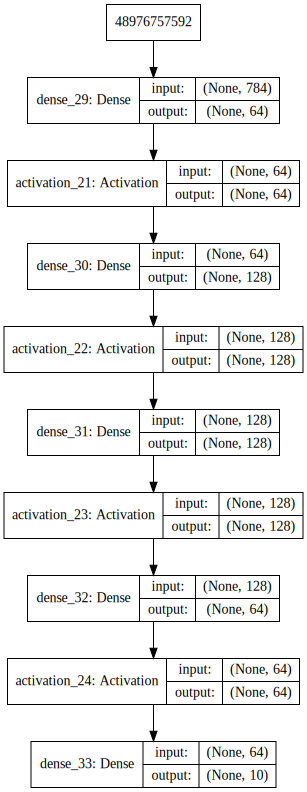

In [43]:
SVG(model_to_dot(multilayer_model, show_shapes=True).create(prog='dot', format='svg'))

# 3. 모델 학습

In [44]:
epochs = 100

histiry = multilayer_model.fit(X_train.reshape((-1,28*28)), 
                          Y_train, 
                          epochs=epochs, 
                          batch_size=100,
                          validation_data=(X_val.reshape((-1,28*28)), Y_val))

Train on 52000 samples, validate on 8000 samples
Epoch 1/100
52000/52000 [==============================] - 6s 106us/step - loss: 0.5785 - acc: 0.7942 - val_loss: 0.4190 - val_acc: 0.8452
Epoch 2/100
52000/52000 [==============================] - 4s 69us/step - loss: 0.3904 - acc: 0.8570 - val_loss: 0.3959 - val_acc: 0.8520
Epoch 3/100
52000/52000 [==============================] - 4s 74us/step - loss: 0.3496 - acc: 0.8709 - val_loss: 0.3844 - val_acc: 0.8575
Epoch 4/100
52000/52000 [==============================] - 3s 64us/step - loss: 0.3242 - acc: 0.8802 - val_loss: 0.3357 - val_acc: 0.8731
Epoch 5/100
52000/52000 [==============================] - 3s 64us/step - loss: 0.3106 - acc: 0.8843 - val_loss: 0.3533 - val_acc: 0.8751
Epoch 6/100
52000/52000 [==============================] - 4s 68us/step - loss: 0.2914 - acc: 0.8922 - val_loss: 0.3257 - val_acc: 0.8763
Epoch 7/100
52000/52000 [==============================] - 3s 66us/step - loss: 0.2776 - acc: 0.8951 - val_loss: 0.3569 - 

# 4. 모델 평가하기

In [45]:
loss_and_metrics = multilayer_model.evaluate(X_test.reshape((-1,28*28)), Y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 45us/step

loss_and_metrics : [0.7408612643964588, 0.8847]


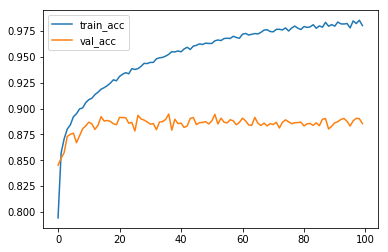

In [46]:
plt.plot(histiry.history['acc'],label='train_acc')
plt.plot(histiry.history['val_acc'],label='val_acc')
plt.legend()

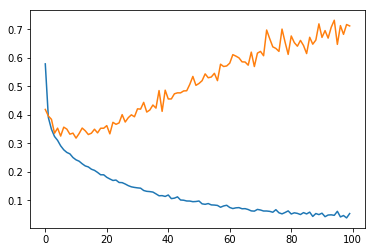

In [47]:
plt.plot(histiry.history['loss'])
plt.plot(histiry.history['val_loss'])

# 드랍아웃 모델

In [48]:
d_model = Sequential()

d_model.add(Dense(units=64, input_dim=28*28))
d_model.add(Activation('relu'))
d_model.add(Dropout(0.2))

d_model.add(Dense(units=128))
d_model.add(Activation('relu'))
d_model.add(Dropout(0.2))

d_model.add(Dense(units=128))
d_model.add(Activation('relu'))
d_model.add(Dropout(0.2))

d_model.add(Dense(units=64))
d_model.add(Activation('relu'))


d_model.add(Dense(units=10, activation='softmax'))


d_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(d_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_25 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
__________

In [49]:
epochs = 100

history = d_model.fit(X_train.reshape((-1,28*28)), 
                          Y_train, 
                          epochs=epochs, 
                          batch_size=100,
                          validation_data=(X_val.reshape((-1,28*28)), Y_val))

Train on 52000 samples, validate on 8000 samples
Epoch 1/100
52000/52000 [==============================] - 8s 155us/step - loss: 0.7002 - acc: 0.7432 - val_loss: 0.4534 - val_acc: 0.8379
Epoch 2/100
52000/52000 [==============================] - 6s 107us/step - loss: 0.4705 - acc: 0.8310 - val_loss: 0.3975 - val_acc: 0.8561
Epoch 3/100
52000/52000 [==============================] - 6s 107us/step - loss: 0.4257 - acc: 0.8462 - val_loss: 0.3775 - val_acc: 0.8639
Epoch 4/100
52000/52000 [==============================] - 6s 106us/step - loss: 0.4020 - acc: 0.8557 - val_loss: 0.3737 - val_acc: 0.8651
Epoch 5/100
52000/52000 [==============================] - 6s 106us/step - loss: 0.3917 - acc: 0.8588 - val_loss: 0.3639 - val_acc: 0.8666
Epoch 6/100
52000/52000 [==============================] - 6s 106us/step - loss: 0.3721 - acc: 0.8639 - val_loss: 0.3526 - val_acc: 0.8702
Epoch 7/100
52000/52000 [==============================] - 6s 108us/step - loss: 0.3660 - acc: 0.8662 - val_loss: 0.3

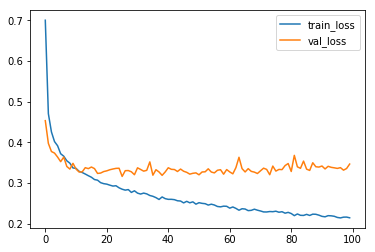

In [54]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

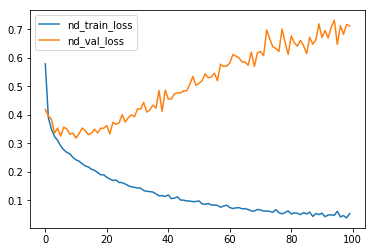

In [55]:
plt.plot(histiry.history['loss'],label='nd_train_loss')
plt.plot(histiry.history['val_loss'],label='nd_val_loss')
plt.legend()

In [51]:
loss_and_metrics = d_model.evaluate(X_test.reshape((-1,28*28)), Y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 1s 53us/step

loss_and_metrics : [0.357447311258316, 0.8853]
